In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive 
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
user = pd.read_csv('/content/drive/My Drive/RAW_interactions.csv')
user.groupby("user_id").size().sort_values(ascending = False).head(30) #searching for the users with the highest ratings

user_id
424680     7671
37449      5603
383346     4628
169430     4076
128473     3917
89831      3353
58104      3288
133174     3107
199848     3018
305531     2902
226863     2874
4470       2739
498271     2644
369715     2610
1072593    2350
176615     2338
95743      2311
286566     2283
39835      2260
107583     2252
80353      2220
88099      2165
166642     2146
131126     2138
222564     2073
107135     2020
140132     1978
126440     1950
280271     1915
461834     1900
dtype: int64

In [4]:
di= {424680  :   7671,
37449    :  5603,
383346  :   4628,
169430   :  4076,
128473   :  3917,
89831    : 3353,
58104    :  3288,
133174   :  3107,
199848   :  3018,
305531   :  2902,
226863   :  2874,
4470     :  2739,
498271   :  2644,
369715   :  2610,
1072593  :  2350,
176615   :  2338,
95743    :  2311,
286566  :   2283,
39835    :  2260,
107583    : 2252,
80353   :   2220,
88099    :  2165,
166642   :  2146,
131126   :  2138,
222564   :  2073,
107135   :  2020,
140132   :  1978,
126440   :  1950,
280271   :  1915,
461834    : 1900}

In [5]:
for i in di:
    df = user.loc[user['user_id']==i]
    df["rating"].sort_values()
    k = {}
    for i in df["rating"]:
        if (i not in k):
            k[i]=1
        else:
            k[i]+=1
    print(k)
    #from this data, we decided to go with the 3rd user for it contains a good
    #amount of ratings and has less bias compared to other users

{5: 7445, 4: 216, 3: 4, 0: 6}
{5: 4823, 4: 667, 0: 106, 3: 7}
{5: 3717, 4: 772, 2: 5, 3: 108, 0: 26}
{5: 3227, 4: 678, 3: 82, 0: 68, 2: 16, 1: 5}
{5: 3609, 4: 273, 3: 29, 0: 5, 2: 1}
{5: 3193, 4: 139, 0: 5, 3: 13, 2: 2, 1: 1}
{5: 2559, 4: 526, 3: 117, 2: 6, 0: 80}
{5: 2375, 4: 663, 0: 17, 2: 9, 3: 40, 1: 3}
{5: 2557, 4: 427, 3: 29, 0: 5}
{4: 134, 5: 2755, 3: 8, 0: 5}
{5: 2495, 4: 301, 3: 45, 0: 27, 1: 2, 2: 4}
{4: 232, 5: 2419, 0: 59, 3: 26, 2: 3}
{4: 830, 5: 1805, 3: 6, 0: 3}
{4: 1351, 3: 254, 5: 983, 0: 6, 2: 14, 1: 2}
{5: 2286, 0: 25, 4: 33, 3: 6}
{5: 2126, 4: 167, 3: 4, 0: 39, 1: 1, 2: 1}
{5: 1977, 0: 130, 4: 155, 2: 8, 3: 41}
{5: 1785, 4: 452, 3: 31, 0: 14, 2: 1}
{4: 891, 5: 1217, 3: 127, 2: 10, 0: 12, 1: 3}
{5: 1932, 4: 276, 3: 34, 0: 8, 2: 2}
{5: 1718, 4: 415, 3: 61, 0: 16, 2: 8, 1: 2}
{4: 645, 5: 1378, 3: 117, 2: 8, 0: 15, 1: 2}
{5: 1856, 4: 266, 3: 21, 2: 1, 0: 2}
{5: 1605, 4: 429, 0: 46, 3: 51, 2: 5, 1: 2}
{5: 1575, 4: 441, 3: 40, 2: 9, 1: 1, 0: 7}
{5: 2011, 0: 7, 4: 2}
{5: 1

In [6]:
df_u3 = user.loc[user['user_id']==383346] #to filter the user dataset to only the selected user
df_u3

,user_id,recipe_id,date,rating,review
329,383346,146401,2009-10-25,5,DH rolled the dough and he told me it was very...
442,383346,426090,2010-05-31,5,I used 2 tablespoon of canola oil. And I used...
535,383346,306919,2008-06-22,5,I loved the creaminess of this gelato. Why bu...
788,383346,448190,2011-02-20,5,Very yummy and great texture. Thanks LadyRatr...
831,383346,431870,2010-07-15,5,This is so yummy. A great grilled cheese. I ...
...,...,...,...,...,...
1131213,383346,450348,2011-10-30,5,This is so good. I used ginger ale on top. T...
1131567,383346,366922,2010-12-04,5,I made half the recipe and it was perfect for ...
1131875,383346,396620,2010-04-27,5,I made it this morning before going to work. ...
1132003,383346,384675,2009-09-15,4,This jam has a very good taste but it's too sw...


In [7]:
import ast
recipes = pd.read_csv('/content/drive/My Drive/RAW_recipes.csv')
recipes["new_ing"]= recipes["ingredients"].transform(lambda x: ast.literal_eval(x))
recipes #the ingredients column contains lists of type string, so we transform them to type list

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients,new_ing
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7,"[winter squash, mexican seasoning, mixed spice..."
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6,"[prepared pizza crust, sausage patty, eggs, mi..."
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13,"[ground beef, yellow onions, diced tomatoes, t..."
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11,"[spreadable cheese with garlic and herbs, new ..."
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8,"[tomato juice, apple cider vinegar, sugar, sal..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
231632,zydeco soup,486161,60,227978,2012-08-29,"['ham', '60-minutes-or-less', 'time-to-make', ...","[415.2, 26.0, 34.0, 26.0, 44.0, 21.0, 15.0]",7,"['heat oil in a 4-quart dutch oven', 'add cele...",this is a delicious soup that i originally fou...,"['celery', 'onion', 'green sweet pepper', 'gar...",22,"[celery, onion, green sweet pepper, garlic clo..."
231633,zydeco spice mix,493372,5,1500678,2013-01-09,"['15-minutes-or-less', 'time-to-make', 'course...","[14.8, 0.0, 2.0, 58.0, 1.0, 0.0, 1.0]",1,['mix all ingredients together thoroughly'],this spice mix will make your taste buds dance!,"['paprika', 'salt', 'garlic powder', 'onion po...",13,"[paprika, salt, garlic powder, onion powder, d..."
231634,zydeco ya ya deviled eggs,308080,40,37779,2008-06-07,"['60-minutes-or-less', 'time-to-make', 'course...","[59.2, 6.0, 2.0, 3.0, 6.0, 5.0, 0.0]",7,"['in a bowl , combine the mashed yolks and may...","deviled eggs, cajun-style","['hard-cooked eggs', 'mayonnaise', 'dijon must...",8,"[hard-cooked eggs, mayonnaise, dijon mustard, ..."
231635,cookies by design cookies on a stick,298512,29,506822,2008-04-15,"['30-minutes-or-less', 'time-to-make', 'course...","[188.0, 11.0, 57.0, 11.0, 7.0, 21.0, 9.0]",9,['place melted butter in a large mixing bowl a...,"i've heard of the 'cookies by design' company,...","['butter', 'eagle brand condensed milk', 'ligh...",10,"[butter, eagle brand condensed milk, light bro..."


In [8]:
recipes_dropped = recipes.drop(["minutes","contributor_id",'submitted','tags','nutrition','n_steps','steps','description','ingredients'],axis=1)
recipes_dropped

,name,id,n_ingredients,new_ing
0,arriba baked winter squash mexican style,137739,7,"[winter squash, mexican seasoning, mixed spice..."
1,a bit different breakfast pizza,31490,6,"[prepared pizza crust, sausage patty, eggs, mi..."
2,all in the kitchen chili,112140,13,"[ground beef, yellow onions, diced tomatoes, t..."
3,alouette potatoes,59389,11,"[spreadable cheese with garlic and herbs, new ..."
4,amish tomato ketchup for canning,44061,8,"[tomato juice, apple cider vinegar, sugar, sal..."
...,...,...,...,...
231632,zydeco soup,486161,22,"[celery, onion, green sweet pepper, garlic clo..."
231633,zydeco spice mix,493372,13,"[paprika, salt, garlic powder, onion powder, d..."
231634,zydeco ya ya deviled eggs,308080,8,"[hard-cooked eggs, mayonnaise, dijon mustard, ..."
231635,cookies by design cookies on a stick,298512,10,"[butter, eagle brand condensed milk, light bro..."


In [9]:
u3_dropped = df_u3.drop(["date",'review'],axis=1)
u3_dropped

,user_id,recipe_id,rating
329,383346,146401,5
442,383346,426090,5
535,383346,306919,5
788,383346,448190,5
831,383346,431870,5
...,...,...,...
1131213,383346,450348,5
1131567,383346,366922,5
1131875,383346,396620,5
1132003,383346,384675,4


In [10]:
g2={}
for i in u3_dropped["recipe_id"]: #creating a dictionary that contains recipes u3 tried
    g2[i]=1
recipes_filtered = recipes_dropped[recipes_dropped.id.isin(g2)]
recipes_filtered #filtering the original recipe dataset to only recipes u3 tried

,name,id,n_ingredients,new_ing
147,ant kelly s london broil marinade,155959,8,"[balsamic vinegar, soy sauce, worcestershire s..."
248,old ladies on a bus chicken,250833,5,"[chicken pieces, orange marmalade, barbecue sa..."
272,sexy greek cocktail,423875,4,"[ouzo, orange juice, ice cube, orange slice]"
351,comfort able kamikaze,285606,4,"[southern comfort, triple sec, lime juice, ice..."
391,gilded zucchini,457965,6,"[zucchini, salt, eggs, milk, breadcrumbs, oil]"
...,...,...,...,...
231346,zucchini rice pilaf,282349,6,"[dried basil, butter, fat-free low-sodium chic..."
231413,zucchini that s cheesy,316637,7,"[butter, onion, sweet red pepper, zucchini, ce..."
231482,zucchini mushroom and pasta skillet,435485,7,"[onion, zucchini, fresh mushrooms, garlic clov..."
231519,zucchini carrot muffins,287490,13,"[all-purpose flour, baking soda, baking powder..."


In [11]:
recipes_filtered["recipe_id"]=recipes_filtered["id"]
recipes_filtered = recipes_filtered.drop("id",axis=1) #making sure the common column between both dataframes has the same name
mergedRes = pd.merge(recipes_filtered, u3_dropped, on ='recipe_id') #merging both dataframes to obtain 1 dataframe
mergedRes #contains recipes tried by user, along with respective ingredients and ratings

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,name,n_ingredients,new_ing,recipe_id,user_id,rating
0,ant kelly s london broil marinade,8,"[balsamic vinegar, soy sauce, worcestershire s...",155959,383346,5
1,old ladies on a bus chicken,5,"[chicken pieces, orange marmalade, barbecue sa...",250833,383346,5
2,sexy greek cocktail,4,"[ouzo, orange juice, ice cube, orange slice]",423875,383346,5
3,comfort able kamikaze,4,"[southern comfort, triple sec, lime juice, ice...",285606,383346,5
4,gilded zucchini,6,"[zucchini, salt, eggs, milk, breadcrumbs, oil]",457965,383346,5
...,...,...,...,...,...,...
4623,zucchini rice pilaf,6,"[dried basil, butter, fat-free low-sodium chic...",282349,383346,5
4624,zucchini that s cheesy,7,"[butter, onion, sweet red pepper, zucchini, ce...",316637,383346,5
4625,zucchini mushroom and pasta skillet,7,"[onion, zucchini, fresh mushrooms, garlic clov...",435485,383346,5
4626,zucchini carrot muffins,13,"[all-purpose flour, baking soda, baking powder...",287490,383346,5


In [12]:
import itertools

x = [0]*231637
for i in range(231637):
   x[i] = recipes_dropped.iloc[i,3]
k = {}
for i in range(231637):
    for j in x[i]:
        if (j not in k):
            k[j]=1
        else:
            k[j]+=1
sorted_values = sorted(k.items(), key=lambda x:x[1],reverse=True) # Sort the values
sorted_dict = dict(sorted_values) #obtain a dictionary with the frequency of each ingredient

In [13]:
p = dict(itertools.islice(sorted_dict.items(),1158))
print(p) #we selected the ingredients for which they have been used at least in 200 recipes
print(len(p))

{'salt': 85746, 'butter': 54975, 'sugar': 44535, 'onion': 39065, 'water': 34914, 'eggs': 33761, 'olive oil': 32822, 'flour': 26266, 'milk': 25786, 'garlic cloves': 25748, 'pepper': 22319, 'brown sugar': 18655, 'garlic': 18087, 'all-purpose flour': 17659, 'baking powder': 17504, 'egg': 17304, 'salt and pepper': 15415, 'parmesan cheese': 14807, 'lemon juice': 14233, 'baking soda': 14099, 'vegetable oil': 13912, 'vanilla': 13315, 'black pepper': 13098, 'cinnamon': 12560, 'tomatoes': 11950, 'sour cream': 11779, 'garlic powder': 10887, 'vanilla extract': 10271, 'oil': 9925, 'honey': 9898, 'onions': 9872, 'cream cheese': 9827, 'garlic clove': 9779, 'celery': 9541, 'cheddar cheese': 8969, 'unsalted butter': 8935, 'soy sauce': 8856, 'mayonnaise': 8736, 'paprika': 7982, 'chicken broth': 7963, 'worcestershire sauce': 7832, 'extra virgin olive oil': 7704, 'fresh parsley': 7656, 'cornstarch': 7486, 'fresh ground black pepper': 7160, 'carrots': 7023, 'parsley': 7001, 'chili powder': 6984, 'bacon': 

In [14]:
for col in p:
    mergedRes[col] = mergedRes["new_ing"].apply(lambda x: 1 if col in x else 0.0001)
#create a feauture column for each ingredient and set it too 1 if present in the recipe and 0.0001 if absent
#we selected 0.0001 since the data is very sparse to avoid having a lot of zeros
mergedRes

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  


,name,n_ingredients,new_ing,recipe_id,user_id,rating,salt,butter,sugar,onion,...,whole wheat tortillas,rubbed sage,dill pickle,hot red pepper flakes,orange extract,jasmine rice,chicken legs,clam juice,dried red pepper flakes,coarse black pepper
0,ant kelly s london broil marinade,8,"[balsamic vinegar, soy sauce, worcestershire s...",155959,383346,5,0.0001,0.0001,0.0001,0.0001,...,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001
1,old ladies on a bus chicken,5,"[chicken pieces, orange marmalade, barbecue sa...",250833,383346,5,0.0001,0.0001,0.0001,0.0001,...,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001
2,sexy greek cocktail,4,"[ouzo, orange juice, ice cube, orange slice]",423875,383346,5,0.0001,0.0001,0.0001,0.0001,...,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001
3,comfort able kamikaze,4,"[southern comfort, triple sec, lime juice, ice...",285606,383346,5,0.0001,0.0001,0.0001,0.0001,...,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001
4,gilded zucchini,6,"[zucchini, salt, eggs, milk, breadcrumbs, oil]",457965,383346,5,1.0000,0.0001,0.0001,0.0001,...,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4623,zucchini rice pilaf,6,"[dried basil, butter, fat-free low-sodium chic...",282349,383346,5,0.0001,1.0000,0.0001,0.0001,...,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001
4624,zucchini that s cheesy,7,"[butter, onion, sweet red pepper, zucchini, ce...",316637,383346,5,1.0000,1.0000,0.0001,1.0000,...,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001
4625,zucchini mushroom and pasta skillet,7,"[onion, zucchini, fresh mushrooms, garlic clov...",435485,383346,5,0.0001,0.0001,0.0001,1.0000,...,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001
4626,zucchini carrot muffins,13,"[all-purpose flour, baking soda, baking powder...",287490,383346,5,1.0000,0.0001,1.0000,0.0001,...,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001


In [15]:
mergedRes = mergedRes.drop(['new_ing','n_ingredients','user_id'],axis = 1) #not needed anymore
mergedRes

,name,recipe_id,rating,salt,butter,sugar,onion,water,eggs,olive oil,...,whole wheat tortillas,rubbed sage,dill pickle,hot red pepper flakes,orange extract,jasmine rice,chicken legs,clam juice,dried red pepper flakes,coarse black pepper
0,ant kelly s london broil marinade,155959,5,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,1.0000,...,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001
1,old ladies on a bus chicken,250833,5,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,...,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001
2,sexy greek cocktail,423875,5,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,...,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001
3,comfort able kamikaze,285606,5,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,...,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001
4,gilded zucchini,457965,5,1.0000,0.0001,0.0001,0.0001,0.0001,1.0000,0.0001,...,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4623,zucchini rice pilaf,282349,5,0.0001,1.0000,0.0001,0.0001,0.0001,0.0001,0.0001,...,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001
4624,zucchini that s cheesy,316637,5,1.0000,1.0000,0.0001,1.0000,0.0001,0.0001,0.0001,...,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001
4625,zucchini mushroom and pasta skillet,435485,5,0.0001,0.0001,0.0001,1.0000,0.0001,0.0001,0.0001,...,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001
4626,zucchini carrot muffins,287490,5,1.0000,0.0001,1.0000,0.0001,0.0001,1.0000,0.0001,...,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001


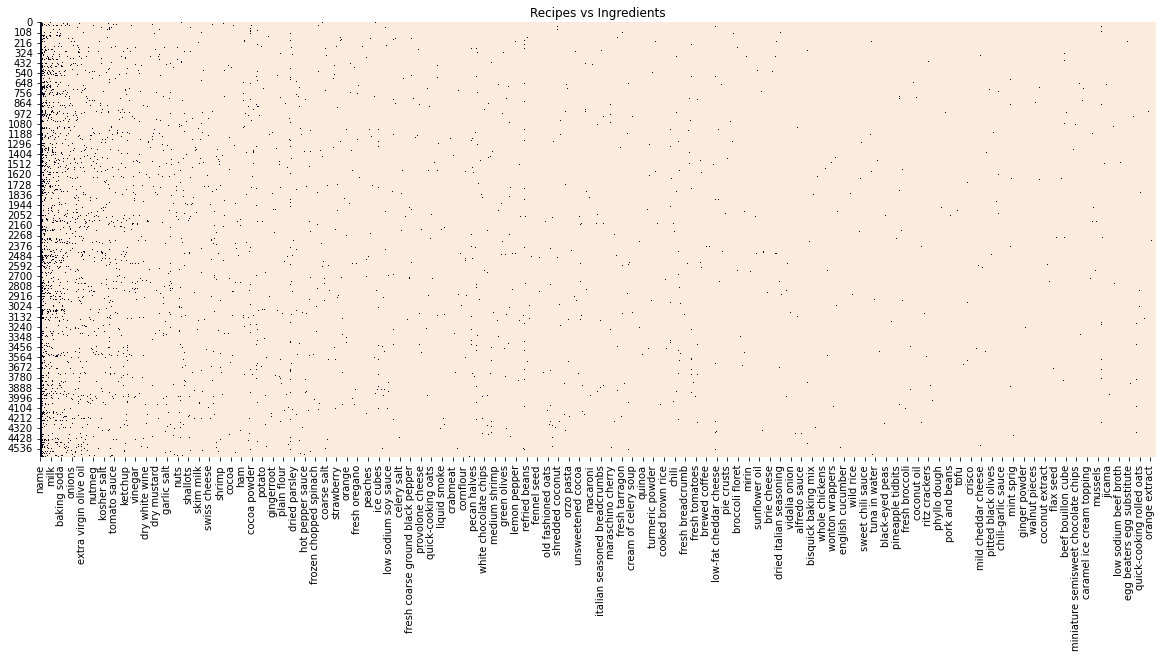

In [16]:
#to model the sparsity of the data
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize=(20,8))
sns.heatmap(mergedRes==0.0001, vmin=0.0001, vmax=1, cbar=False, ax=ax).set_title("Recipes vs Ingredients")
plt.show() #we can see that we have a lot of zeros, that's why we replace the zeros by a small number epsilon which is in this case 0.0001

In [17]:
from google.colab import files
mergedRes.to_csv('preprocessed_data.csv')
files.download('preprocessed_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>